<a href="https://colab.research.google.com/github/sofipop/Simulaci-n_I/blob/main/met_aceptacion_y_rechazo_para_distri_triangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Méetodo de Aceptación y Rechazo para la Distribución Triangular
El método permite generar muestras aleatorias a partir de funciones de densidad que no tienen una forma inversible simple. En este caso con la función de densidad triangular y se utiliza una función envolvente uniforme para aceptar o rechazar los valores generados aleatoriamente.


##1.1 Importación de librerias
- random para generar numeros aleatorios
- numpy para operaciones numericas
- matplotlib.pyplot para graficar

In [63]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

##1.2 Parámetros
- a y c son los límites inferior y superior
- b muestra donde esta el pico
- M el valor máximo de la función de densidad


In [64]:
a=1
b=3
c=5
M=(2)/(c-a)

##1.3 Función de densidad triangular
- Para x entre a y b, la función sube linealmente
- Para x entre b y c, la función baja linealmente
- Fuera del intervalo [a,c] la función vale 0


In [66]:
#Haciendo la triangular
def f(x):
  if a <= x <= b:
    return 2 * (x - a) / ((b - a) * (c - a))
  elif b < x <= c:
    return 2 * (c - x) / ((c - b) * (c - a))
  else:
    return 0

##1.4 Método de aceptación y rechazo
- n es el número de muestras deseadas
- Se generan pares (x,y) aleatorios
- Si $y<=f(x)$, se acepta x como muestra válida

In [67]:
def aceptacion (n):
  muestras=[]
  while len(muestras)<n:
    R1=rd.random()
    R2=rd.random()
    x=a+((c-a)*R1)
    y=M*R2
    if y<=f(x):
      muestras.append(x)
  return muestras

##1.5 Generar los datos


In [68]:
muestras=aceptacion(10000)

##1.6 Cálculos estadísticos


In [75]:
print("Desviación estandar",np.std(muestras))
print("Media",np.mean(muestras))
#COMPARACION CON LOS RESULTADOS TEORICOS
media_t=(a+b+c)/3
desv_est_t=np.sqrt(((a**2)+(b**2)+(c**2)-(a*b)-(a*c)-(b*c))/18)
print("Media teorica: ",media_t)
print("Desviacion estandar teorico: ",desv_est_t)

Desviación estandar 0.8192939099086061
Media 2.998616985292746
Media teorica:  3.0
Desviacion estandar teorico:  0.816496580927726


##1.7 Grafica
Se grafica el histograma y la curva teórica para verificar visualmente que los datos siguen la distribución deseada

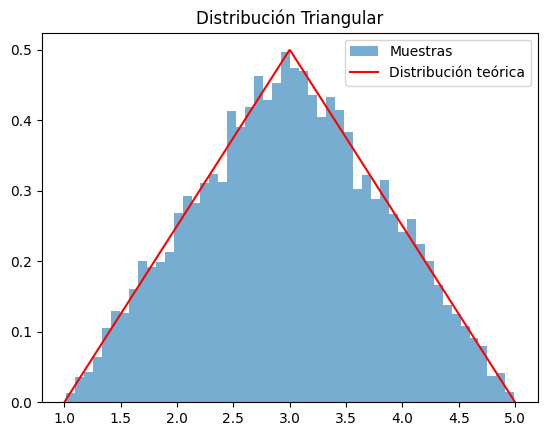

In [73]:
plt.hist(muestras, bins=50, density=True, alpha=0.6, label="Muestras")

# Curva teórica
x_vals = np.linspace(a, c, 500)
y_vals = [f(x) for x in x_vals]
plt.plot(x_vals, y_vals, 'r-', label="Distribución teórica")

plt.title("Distribución Triangular")
plt.legend()
plt.show()


##1.8 Conclusión
A traves del método de aceptación y rechazo, se logró generar una muestra aleatoria que sigue una distribución triangular definida por los parámetros a=1,b=3 y c=5.
Demuestra la efectividad del método para simular distribuciones no triviales.